# Analysis Notebook - asEventsByTissueAndSplicingType

This notebook uses inputs generated from the `countGenesAndEvents.ipynb` to create its figures.

## 1 Loading dependencies

In [1]:
library(ggplot2)
library(tidyverse)
library(viridis)
library(magrittr)
Sys.setenv(TAR = "/bin/tar") # for gzfile

### 1.1 getTissueReduction

### 2.1 Sex-biased alternative splicing index for each chromosome

This plot is based upon a file 'SplicingIndex_chr.tsv' that was generated by xx program.   It is sorted
in decreasing order by index, and the size of the circle reflects XXXX.



### 2.2 Calculation of the Sex-Biased Splicing Index
The normalized sex-biased splicing index is defined as the number of statistically significant splicing events per 1000 exons in the chromosome.

The plot will post the ranked by splicing index on the y-axis by the chromosomes on the x-axis

In [2]:
# SplicingIndex_chr.tsv is generated by countGenesAndEvents.ipynb and found in ../data
dat <- read.table("../data/SplicingIndex_chr.tsv", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
dat

chr,n,ExonCounts,Index
<fct>,<int>,<int>,<dbl>
chrX,236,40029,5.895726
chr22,100,28655,3.489792
chr11,194,75976,2.553438
chr4,127,50420,2.518842
chr10,115,47124,2.440370
chr15,113,47343,2.386836
chr12,168,73881,2.273927
chr16,139,61199,2.271279
chr9,104,46079,2.256993


In [3]:
# sort by index
res_sorted <- dat[order(dat$Index, decreasing=TRUE),]
res_sorted

,chr,n,ExonCounts,Index
,<fct>,<int>,<int>,<dbl>
1,chrX,236,40029,5.895726
2,chr22,100,28655,3.489792
3,chr11,194,75976,2.553438
4,chr4,127,50420,2.518842
5,chr10,115,47124,2.440370
6,chr15,113,47343,2.386836
7,chr12,168,73881,2.273927
8,chr16,139,61199,2.271279
9,chr9,104,46079,2.256993


In [4]:
# though we read in the `tsv` file with stringsAsFactors = true, lets ensure this is the case
res_sorted$chr <- factor(res_sorted$chr, levels = res_sorted$chr)

In [5]:
# set the colors
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.5)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)

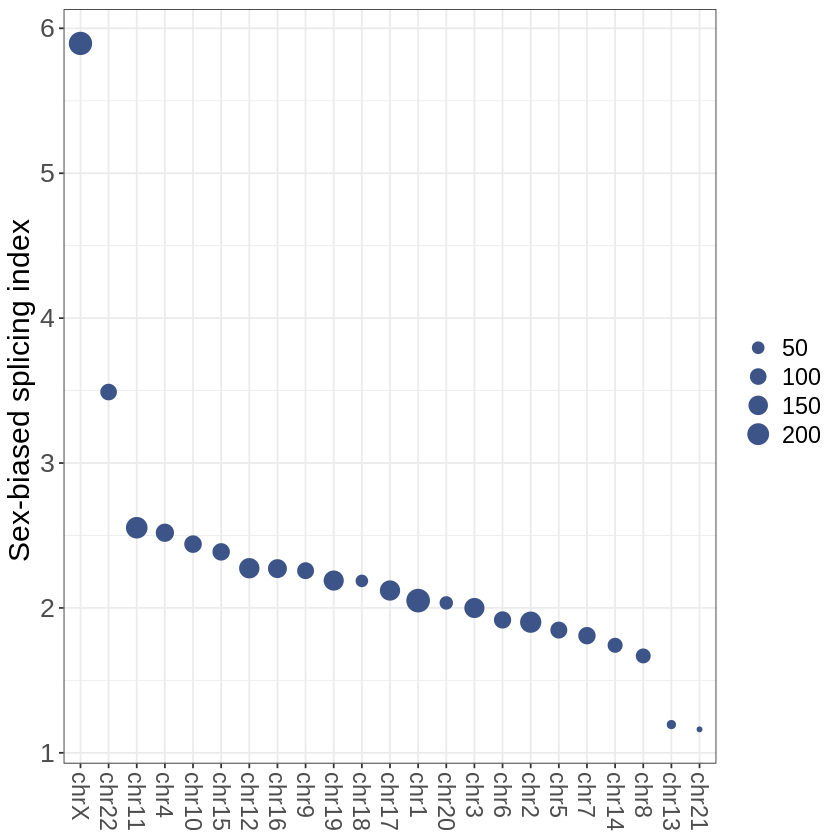

In [6]:
# make the plot 
splicingByChromosome <- ggplot(res_sorted, aes(x = chr, y = Index, size = n)) +
  geom_point(color=npgBlue) +
  theme_bw() +
  theme(axis.text.x = element_text(size=14, angle = 270, hjust = 0.0, vjust = 0.5),
	axis.text.y = element_text(size=16),
	axis.title.x = element_blank(),
	axis.title.y = element_text(face="plain", colour="black",
                                    size=18),
	legend.title=element_blank(),
	legend.text = element_text(face="plain", colour="black",
                                   size=14)) +
  scale_fill_viridis_c() +
  ylab(paste("Sex-biased splicing index ")) +
  xlab("Chromosomes") +
  guides(size = guide_legend(title = "Number of ASE"))
splicingByChromosome


In [ ]:
## save as a pdf
pdf ("../pdf/splicingByChromosome.pdf")
splicingByChromosome
dev.off()

### 2.3 Proportions of AS events that were strictly tissue specific, present in 2-5, or over 5 tissues

Read in the file `genesWithCommonAs.tsv` containing number of splicing events per gene and number of tissues.

In [ ]:

dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/genesWithCommonAS.tsv", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
head(dat)

### 2.4 Getting Proportions
Making a table of the number of tissues per gene will get us the 
numbers we need for the proportions of alternative splicing events (AS) 
that are strictly tissue specific

In [ ]:
tissue_specificity_cnt <- table(dat$Tissues)
tissue_specificity_cnt

### 2.5 Make an Array of the table
Make an array of the table to access the values based upon the index

In [ ]:
a <- unclass(tissue_specificity_cnt)
a

### 2.6 Names for logic

Using the names of this array contain the numbers of genes
with those number of splicing events, which we then can use for logical reasoning, such as number of genes that have tissue specific splicing events.  The length of this vector is equal to the length of the array.
Using this logical value within the array will allow us to sum the events for our figure.

In [ ]:
tissue_cnts <- as.numeric(unclass(names(a)))
tissue_cnts == 1
a[tissue_cnts == 1]
low_cnt <- sum(as.numeric(a[tissue_cnts == 1]))
low_cnt

In [ ]:
a[tissue_cnts > 1 & tissue_cnts < 6]
medium_cnt <- sum(as.numeric(a[tissue_cnts > 1 & tissue_cnts < 6]))
medium_cnt

In [ ]:
a[tissue_cnts > 4]
high_cnt <- sum(as.numeric(a[tissue_cnts > 4]))
high_cnt

In [ ]:
## set the colors
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.8)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)


Make the pie chart figure 2c illustrating number of genes that are spliced and present in only 1 tissue, 2-5 tissues and the number of genes that are alternatively spliced in greater than 5 tissues.

In [ ]:
colrs <- c(npgRed,npgBlue,npgGreen)
slices <-c(low_cnt, medium_cnt, high_cnt)
lbls <-c("1 tissue","2-5 tissues",">5 tissues")
pct <- round(slices/sum(slices)*100, digits=1)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=colrs,main="",cex=1.5,xaxs="r",yaxs="r")

In [ ]:
pdf ("../pdf/figure2c.pdf")
pie(slices,labels = lbls, col=colrs,main="",cex=1.5,xaxs="r",yaxs="r")
dev.off()

### Genes with over 10 significant sex-biased AS events.

PREVIOUS VERSION Most of the AS events were specific to one tissue, but slightly over 12% were found in 2-5 tissues, with only 9 AS events being found in more than 5 tissues (Fig. 2c). 27 genes were found to have >10 AS events (Fig. 2d). 

-- We basically need to count the number of tissues per AS event (Figure 2c) and the number of AS events per gene (FIgure 2d)



The colour coding represents the number of affected tissues, sorted in decreasing order by the number of sex-biased splicing events per gene.

Read in the output of the XX script.

In [ ]:
dat <- read.table(file ="https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/genesWithCommonAs.tsv",
                sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(dat)
dim(dat)

Remove all genes that have less than 10 splicing events.

In [ ]:
res <- dat[dat$n > 10,]
head(res)
dim(res)

Arrange the data in descending order in terms of the number of splicing events per gene

In [ ]:
res <- res[order(res$n, decreasing=TRUE),]
head(res)

Make sure the GeneSymbols are treated as factors, to ease the plotting.


In [ ]:
res$GeneSymbol <- factor(res$GeneSymbol, levels = res$GeneSymbol)

Now make the plot, using viridis to fill the dots according to the amount of splicing per tissue.  The number of splicing events per gene does not necessarily correlate with the number of tissues that gene is involved with splicing.  Fewer tissues, more splicing events, mean that within a tissue there are more splicing events.  More Tissues and fewer splicing events for that gene indicates a level of tissue specificity with the splicing.

In [ ]:
p<-ggplot(res, aes(x = GeneSymbol, y = n)) +
  geom_point(size = 4, aes(fill = Tissues, color = Tissues)) +
  theme_bw() +
  theme(axis.text.x = element_text(size=14, angle = 270, hjust = 0.0, vjust = 0.5),
        axis.text.y = element_text(size=16),
        axis.title.x = element_blank(),
        axis.title.y = element_text(face="plain", colour="black", 
                                    size=16),
        legend.title=element_blank(),
        legend.text = element_text(face="plain", colour="black", 
                                   size=16)) +
  scale_fill_viridis_c(aesthetics = c("colour", "fill"),
                       option = "plasma",
                       limits = c(1, 30), breaks = c(10, 20, 30)) +
  ylab(paste("Number of sex-biased splicing events"))

p


Save the figure to the pdf directory

In [ ]:
ggsave(file = "../pdf/Figure2d.pdf", plot = p)

### 2.7 Genes with over 10 significant sex-biased AS events.

The colour coding represents the number of affected tissues, sorted in decreasing order by the number of sex-biased splicing events per gene.

### 2.8 Reading the Significant Splicing Events by Tissue Results

Starting with the output from running xx script, this file that summarizes the significant splicing events by tissue is then limited to only those tissues that have greater than 10 splicing events, and then the distribution of the 5 splicing events, A3SS, A5SS, RI, SE, and MXE as a percentage of the whole are compared between the tissues.

In [ ]:
df <- read.table(file ="../data/Significant_events.tsv",
                sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(df)

Another file, which created simplifying labels is read in as well.   It is produced by XX script.

In [ ]:
totals <- read.table("../data/totals_by_tissue.tsv", 
                     sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(totals)

Using the summarizing label, where the tissues match, annotated, to summarized output, we provide the annotation label.  This will help us make the figure with cleaner labels.

In [ ]:
idx <- match(df$Tissue, totals$Tissue)
df$Label <- totals$Label[idx]
df$Label <- factor(df$Label, levels = totals$Label)

dim(df)
dim(totals)
head(df)

Just as a check, lets ensure that the total splicing events has not been altered.

In [ ]:
sum(df$Counts)
sum(totals$Total)


What is the distribution of the one file with annotation for the various counts of splicing events.

In [ ]:
table(totals$Total)

One might expect greater granularity in the significant events file, that is not summarized, and as expected, the totals are lower as they are not summarized by tissue, but still broken out by each of the splicing events, which we want to preserve for this figure.

In [ ]:
table(df$Counts)

We are limiting the figure to only those tissues that have greater than ten splicing events.

In [ ]:
tissues_keep <- totals[totals$Total > 10,]
head(tissues_keep)

In [ ]:
df_plot <- data.frame()


This is a bit of a sanity check, before the loop is run, to see that the summary label works as we would like.  What we expect to see here is the same label on the far right for each of the alternative splicing events.  Looks good!

In [ ]:
df_tissue <- df[(df$Label %in% totals$Label[1]),]

In [ ]:
df_tissue

In [ ]:
total_df_counts <- sum(df$Counts)
total_df_counts

Another check, before we go for the loop, to make sure all is clean -- probably not necessary to break out each of the alternative splicing events separately, but it keeps ones mind clear on these events.

In [ ]:
length(totals$Label)
length(tissues_keep$Label)
tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
               df$ASE=='A5SS' |
               df$ASE=='RI'   |
               df$ASE=='MXE'  |
               df$ASE=='SE'   ) & df$Label == tissues_keep$Label[1]])

tissue_splicing_events
all_splicing_events = sum(tissues_keep$Total)
all_splicing_events
percentage <- tissue_splicing_events/all_splicing_events*100
percentage

In [ ]:
total_splicing_events = sum (tissues_keep$Total)
total_splicing_events


Now, we create a new data frame (df_plot), which contains the label, as well as the percentages.   This will be our data for our plot.

In [ ]:
df_plot <- data.frame()
for (i in 1:length(tissues_keep$Label)) {
    tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
                                          df$ASE=='A5SS' |
                                          df$ASE=='RI'   |
                                          df$ASE=='MXE'  |
                                          df$ASE=='SE'   ) 
                                        & df$Label == tissues_keep$Label[i]])
    
    df_tissue      <- df[(df$Label %in% tissues_keep$Label[i]),]
    df_tissue$Perc <- (df_tissue$Counts / tissue_splicing_events) * 100
    if (i == 1)
        df_plot <- df_tissue
    else
        df_plot <- rbind(df_plot, df_tissue)
}  
dim(df_plot)
head(df_plot)

Now, we make our plot, it will be collored by the proportion of each splicing event for each of the tissues that have greater than 10 splicing events.   

In [ ]:
p<-ggplot(df_plot, 
       aes(x=Label, y=Perc, fill = ASE, by = Tissue)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Tissue")
p

In [ ]:
ggsave(file = "../pdf/Figure2e.pdf", plot = p)

### 2.9 Splicing by chromosome

Percentage is shown for the entire set of 631 investigated X chromosomal genes, as well as the subsets of 248 genes with differential expression (DE) and 166 with at least one AS event. P-values were derived with Fisher’s exact test comparing genes with DE or AS to the entire set of 631 genes

### Loading dependencies

### Read in the rMATS results for parsing the gencode or other GTF

rMATS 3.2.5 parses the annotation file, gencode v.30 in this example, and creates the SE, RI, MXE, A3SS, A5SS events.

In [ ]:
# a code block
getwd()
fromGTFSE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.SE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFSE.dat$AStype <- 'SE'
fromGTFRI.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.RI.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFRI.dat$AStype <- 'RI'
fromGTFMXE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.MXE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFMXE.dat$AStype <- 'MXE'
fromGTFA5SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A5SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA5SS.dat$AStype <- 'A5SS'
fromGTFA3SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A3SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA3SS.dat$AStype <- 'A3SS'

head(fromGTFSE.dat)
head(fromGTFMXE.dat)
head(fromGTFRI.dat)
head(fromGTFA3SS.dat)
head(fromGTFA5SS.dat)

In [ ]:
summaryAS.df <- rbind(fromGTFSE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFRI.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFMXE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA5SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA3SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")])

In [ ]:
chr_specific_splicing_SE <- table(summaryAS.df$chr[summaryAS.df$AStype == "SE"])
a_chr_SE <- unclass(chr_specific_splicing_SE)
# a_chr_SE
chr_specific_splicing_RI <- table(summaryAS.df$chr[summaryAS.df$AStype == "RI"])
a_chr_RI <- unclass(chr_specific_splicing_RI)
# a_chr_RI
chr_specific_splicing_MXE <- table(summaryAS.df$chr[summaryAS.df$AStype == "MXE"])
a_chr_MXE <- unclass(chr_specific_splicing_MXE)
# a_chr_MXE
chr_specific_splicing_A3SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A3SS"])
a_chr_A3SS <- unclass(chr_specific_splicing_A3SS)
#a_chr_A3SS
chr_specific_splicing_A5SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
a_chr_A5SS <- unclass(chr_specific_splicing_A5SS)
print("A5SS (other examples commented out):")
table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
#a_chr_A5SS

In [ ]:
chr_splicing_dist <- rbind(cbind(data.matrix(a_chr_SE),   chr=names(a_chr_SE),  AStype = "SE"),
                           cbind(data.matrix(a_chr_RI),   chr=names(a_chr_RI),  AStype = "RI"),
                           cbind(data.matrix(a_chr_MXE),  chr=names(a_chr_MXE), AStype = "MXE"),
                           cbind(data.matrix(a_chr_A3SS), chr=names(a_chr_A3SS),AStype = "A3SS"),
                           cbind(data.matrix(a_chr_A5SS), chr=names(a_chr_A5SS),AStype = "A5SS"))
colnames(chr_splicing_dist)=c("Counts","Chr","AStype")
counts <- chr_splicing_dist[,"Counts"]
chr_splicing_df <- data.frame(chr_splicing_dist)
head(chr_splicing_df)
chr_splicing_df$Counts <- as.integer(counts)
head(chr_splicing_df)
head(chr_splicing_df$Counts)

In [ ]:
dim(chr_splicing_dist)

In [ ]:
chromosomes <- names(a_chr_SE)
chromosomes <- chromosomes[order(chromosomes)]
chromosomes

In [ ]:
colnames(chr_splicing_dist)

In [ ]:
chr_splicing_df[chr_splicing_df$Chr==chromosomes[1],]

In [ ]:
#chr_splicing_df$Chr
sum(chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],"Counts"])

In [ ]:
df_chromosome     <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],]
df_chromosome

In [ ]:
percentage <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
percentage

In [ ]:
df_plot <- data.frame()

for (i in 1:length(chromosomes)) {
    df_chromosome  <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[i],]
    percentage     <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
    final <- cbind(df_chromosome, Perc=percentage)
    if (i == 1)
        df_plot <- final 
    else
        df_plot <- rbind(df_plot, final)
}  

dim(df_plot)
head(df_plot)

In [ ]:
p<-ggplot(df_plot, 
       aes(x=Chr, y=Perc, fill = AStype, by = Chr)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Chromosome")
p

In [ ]:
ggsave(file = "../pdf/figureSplicingByChromosome.pdf", plot = p)

more of the above sequence

### Appendix - Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### Appendix 1. Checksums with the sha256 algorithm

In [ ]:
notebook_id   = "asEventsByTissueAndSplicingType"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", notebook_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", notebook_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

### Appendix 2. Libraries metadata

In [ ]:
dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", notebook_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", notebook_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]